# Лабораторная работа №3: Обработка бинарных изображений. Морфология

*Вариант 1*

Выполнил:

студент группы 6132-010402D

Баканов Дмитрий

*Исходные данные:*

| Вероятность p | Вид структурного элемента |
|---------------|---------------------------|
| 0,1           | крест 5×5                 |

In [1]:
import cv2
import itertools
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import warnings
from IPython.display import clear_output


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def plot_image(input_image: np.ndarray) -> None:
    """Функция отрисовки изображения."""
    image_shape = input_image.shape
    plt.figure(figsize=(5, 5))
    plt.axis("off")
    if len(image_shape) == 3:
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(input_image, cmap='gray')


def noise_factor(image_1: np.ndarray, image_2: np.ndarray) -> int:
    """Функция подсчета коэффициента шума."""
    return np.sum(image_1 != image_2)

*Задание 1. Создать средствами OpenCV бинарное изображение с простым рисунком.*

* *Русунок из простых фигур: квадрат, круг и т.д.*

(200, 200)

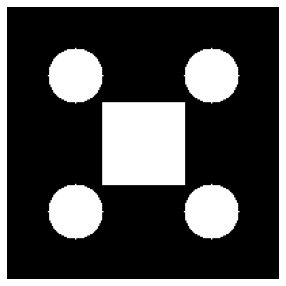

In [3]:
IMAGE_HEIGHT, IMAGE_WIDTH = 200, 200
image = np.full(shape=(IMAGE_HEIGHT, IMAGE_WIDTH), fill_value=0)

cv2.circle(image, center=(50, 50), radius=20, color=(1, 1, 1), thickness = -1)
cv2.circle(image, center=(150, 150), radius=20, color=(1, 1, 1), thickness = -1)
cv2.circle(image, center=(150, 50), radius=20, color=(1, 1, 1), thickness = -1)
cv2.circle(image, center=(50, 150), radius=20, color=(1, 1, 1), thickness = -1)
cv2.rectangle(image, pt1=(70, 70), pt2=(130, 130), color=(1, 1, 1), thickness = -1)

plot_image(image)
image.shape

In [4]:
print(f"Проверка подсчета коэффициента зашумленности: {noise_factor(image, image)}")

Проверка подсчета коэффициента зашумленности: 0


*Задание 2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).*

* *Вход: изображение из пункта 1*
* *Вывод: зашумленное изображение*

In [5]:
def pulse_noise(input_image: np.ndarray, prob: float = 0.1) -> np.ndarray:
    """Реализация импульсного шума."""
    rows, cols = input_image.shape
    result_image = input_image.copy()

    pixels_combinations = list(itertools.product(range(rows), range(cols)))
    noise_pixels = [pixel for pixel in pixels_combinations if np.random.random() <= prob]

    for noise_pixel in noise_pixels:
        result_image[noise_pixel[0], noise_pixel[1]] = 1

    return result_image

Коэффициент зашумленности: 3200


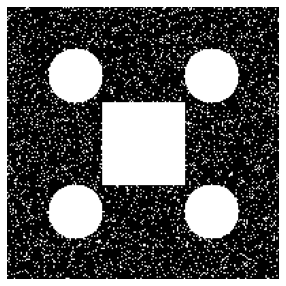

In [6]:
noise_image = pulse_noise(image)
plot_image(noise_image)
print(f"Коэффициент зашумленности: {noise_factor(image, noise_image)}")

*Задание 3. Написать функции реализации эрозии и дилатации.*

> Функции вида fun(Image, struct)
Где struct  - структурный элемент в виде матрицы

In [7]:
def erosion(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:
    """Функция реализации эрозии."""
    rows, cols = input_image.shape
    struct_rows, struct_cols = struct.shape

    augmented_image = np.zeros((rows + 2, cols + 2))
    augmented_image[ 1 : -1, 1 : -1] = input_image
    result_image = input_image.copy()

    for i in tqdm(range(rows)):
        for j in range(cols):

            current_window = augmented_image[i : i + struct_rows, j : j + struct_cols]
            result_image[i, j] = np.min(current_window[struct])

    clear_output()
    return result_image


def dilatation(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:
    """Функция реализации дилатации."""
    rows, cols = input_image.shape
    struct_rows, struct_cols = struct.shape

    augmented_image = np.zeros((rows + 2, cols + 2))
    augmented_image[ 1 : -1, 1 : -1] = input_image
    result_image = input_image.copy()

    for i in tqdm(range(rows)):
        for j in range(cols):

            current_window = augmented_image[i : i + struct_rows, j : j + struct_cols]
            result_image[i, j] = np.max(current_window[struct])

    clear_output()
    return result_image

*Задание 4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.*

* *Вход: изображение из пункта 2*
* *Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и изображения после эрозии и дилатации.*

In [8]:
STRUCT_ELEMENT = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
])
STRUCT_ELEMENT

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

Исходное изображение


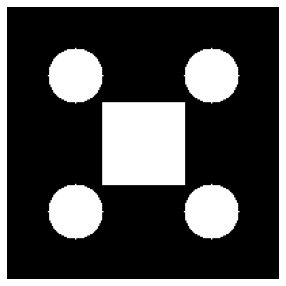

In [9]:
print("Исходное изображение")
plot_image(image)

Зашумленное изображение
Коэффициент зашумленности: 3200


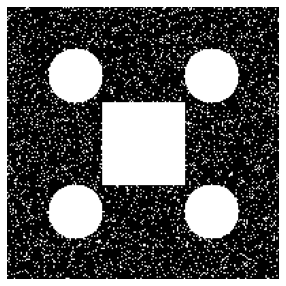

In [10]:
print("Зашумленное изображение")
plot_image(noise_image)
print(f"Коэффициент зашумленности: {noise_factor(image, noise_image)}")

Изображение после эрозии
Коэффициент зашумленности: 1056


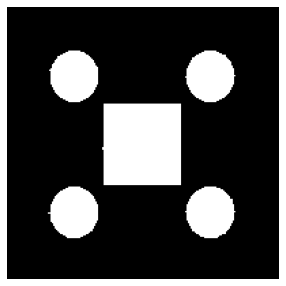

In [11]:
erosion_image = erosion(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после эрозии")
plot_image(erosion_image)
print(f"Коэффициент зашумленности: {noise_factor(image, erosion_image)}")

Изображение после дилатации
Коэффициент зашумленности: 20819


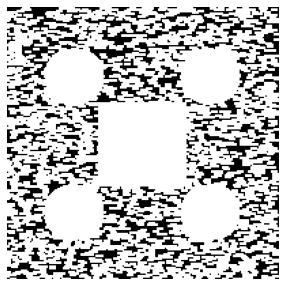

In [12]:
dilatation_image = dilatation(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после дилатации")
plot_image(dilatation_image)
print(f"Коэффициент зашумленности: {noise_factor(image, dilatation_image)}")

*Задание 5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).*
*Подсчитать коэффициент шума для результа фильтрации.*

* *Вход: изображение из пункта 2*
* *Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и изображения после эрозии и дилатации. Коэффициент шума.*
* *Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.*

In [13]:
def autopsies(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:
    """Функция реализации вскрытия."""
    return dilatation(erosion(input_image, struct), struct)

def closing(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:
    """Функция реализации закрытия."""
    return erosion(dilatation(input_image, struct), struct)

Исходное изображение


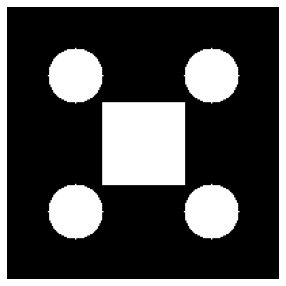

In [14]:
print("Исходное изображение")
plot_image(image)

Зашумленное изображение
Коэффициент зашумленности: 3200


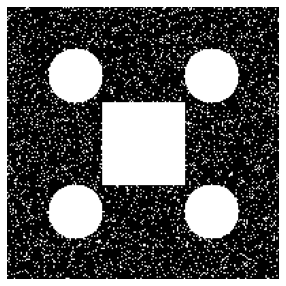

In [15]:
print("Зашумленное изображение")
plot_image(noise_image)
print(f"Коэффициент зашумленности: {noise_factor(image, noise_image)}")

Изображение после эрозии
Коэффициент зашумленности: 1056


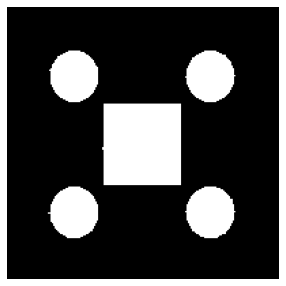

In [16]:
erosion_image = erosion(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после эрозии")
plot_image(erosion_image)
print(f"Коэффициент зашумленности: {noise_factor(image, erosion_image)}")

Изображение после дилатации
Коэффициент зашумленности: 20819


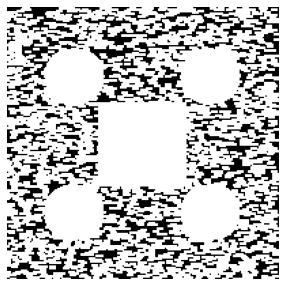

In [17]:
dilatation_image = dilatation(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после дилатации")
plot_image(dilatation_image)
print(f"Коэффициент зашумленности: {noise_factor(image, dilatation_image)}")

Изображение после закрытия
Коэффициент зашумленности: 8384


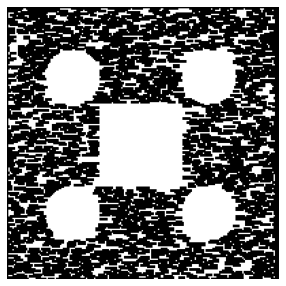

In [18]:
closing_image = closing(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после закрытия")
plot_image(closing_image)
print(f"Коэффициент зашумленности: {noise_factor(image, closing_image)}")

Изображение после вскрытия
Коэффициент зашумленности: 1083


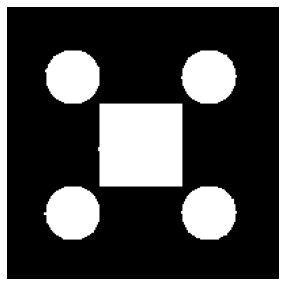

In [19]:
autopsies_image = autopsies(noise_image, struct=STRUCT_ELEMENT)
print("Изображение после вскрытия")
plot_image(autopsies_image)
print(f"Коэффициент зашумленности: {noise_factor(image, autopsies_image)}")

*Задание 6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.*

* *Вход: изображение из пункта 2*
* *Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.*
* *Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.*
* *Таблица логического фильтра в лекции слайд 17.*

In [20]:
def get_value_for_logic_filter(input_image: np.ndarray, x: int, y: int) -> int:
    """Функция формирования результирующего значения для логического фильтра."""
    value = input_image[x, y] and \
            (input_image[x - 1, y] or input_image[x, y - 1] or input_image[x, y + 1] or input_image[x + 1, y]) \
            or (not input_image[x, y]) \
            and (input_image[x - 1, y] and input_image[x, y - 1] and input_image[x, y + 1] and input_image[x + 1, y])
    return int(value)


def logic_filter(input_image: np.ndarray) -> np.ndarray:
    """Функция логического фильтра."""
    rows, cols = input_image.shape

    result_image = input_image.copy()
    augmented_image = np.zeros((rows + 2, cols + 2))
    augmented_image[ 1 : -1, 1 : -1] = input_image
    augmented_image = augmented_image.astype(bool)

    for i in range(rows):
        for j in range(cols):
            result_image[i, j] = get_value_for_logic_filter(augmented_image, i, j)

    return result_image

Исходное изображение


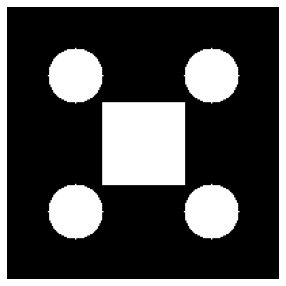

In [21]:
print("Исходное изображение")
plot_image(image)

Зашумленное изображение
Коэффициент зашумленности: 3200


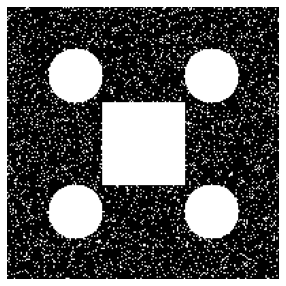

In [22]:
print("Зашумленное изображение")
plot_image(noise_image)
print(f"Коэффициент зашумленности: {noise_factor(image, noise_image)}")

Изображение после логического фильтра
Коэффициент зашумленности: 1807


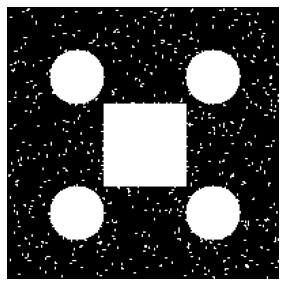

In [23]:
logic_fil_image = logic_filter(noise_image)
print("Изображение после логического фильтра")
plot_image(logic_fil_image)
print(f"Коэффициент зашумленности: {noise_factor(image, logic_fil_image)}")

*Задание 7. На исходном изображении с помощью морфологических операций выделить контур объекта.*
*Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.*

* *Вход: изображение из пункта 1*
* *Вывод: исходное изображение, изображение с выделенными контурами.*

Исходное изображение


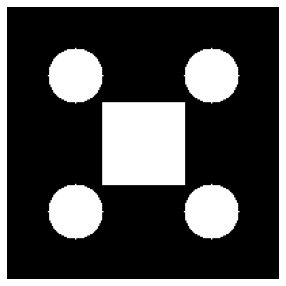

In [24]:
print("Исходное изображение")
plot_image(image)

In [25]:
struct_el = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
])

Восьмисвязный внутренний контур


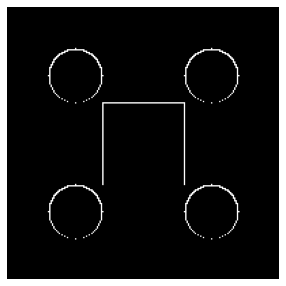

In [26]:
plot_image((image + erosion(image, struct=struct_el)) % 2)
print("Восьмисвязный внутренний контур")

Четырехсвязный внутренний контур


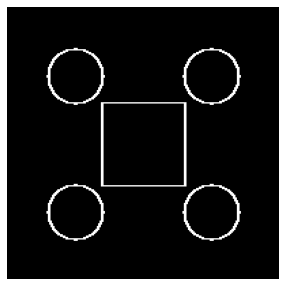

In [27]:
plot_image((erosion(image, struct=struct_el) + dilatation(image, struct=struct_el)) % 2)
print("Четырехсвязный внутренний контур")

Внешний контур


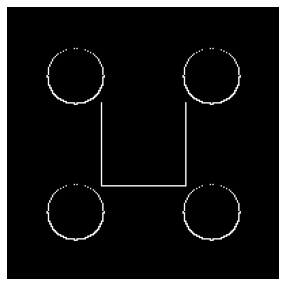

In [28]:
plot_image((image + dilatation(image, struct=struct_el)) % 2)
print("Внешний контур")

*Задание 8. На исходном изображении с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.*

* *Вход: изображение из пункта 1*
* *Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.*

Исходное изображение


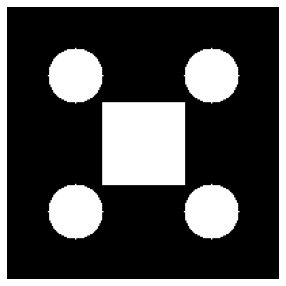

In [29]:
print("Исходное изображение")
plot_image(image)

Вертикальные контуры изображение


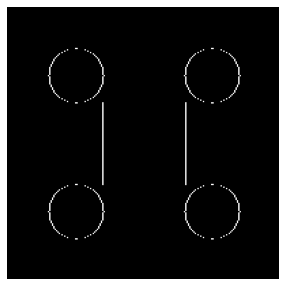

In [35]:
struct_el = np.array([
    [1],
    [1],
    [1],
])
ver_image = (image + dilatation(image, struct=struct_el)) % 2
plot_image(ver_image)
print("Вертикальные контуры изображение")

Горизонтальные контуры изображение


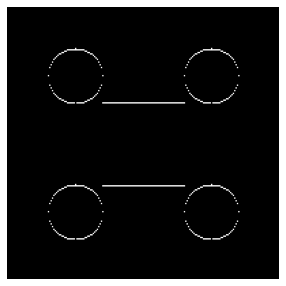

In [36]:
struct_el = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
])
hor_image = (image + autopsies(image, struct=struct_el)) % 2
plot_image(hor_image)
print("Горизонтальные контуры изображение")